# EarthCam Data Science Assignment - Raul Hincapie's Code
#### Raul Hincapie
#### 6-20-2023

## Packages/Libraries

In [1]:
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from numpy.linalg import norm
from pathlib import Path
from tqdm import tqdm

from statistics import mean
import pandas as pd
import numpy as np
import itertools
import calendar
import datetime
import sklearn
import string
import scipy
import glob
import math
import time
import ast
import csv
import os

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Files within folder

In [2]:
# Accessing all files within folder. Helps to see naming convention of file to convert to dataframe
#currentListOfExcels = list(glob.glob("**/*.xlsx", recursive = True))
#print(currentListOfExcels)

## Accessing the data

In [3]:
# Extracting data from data excel workbook
dataDF = pd.read_excel('Data.xlsx', sheet_name = 'Data')
display(dataDF)

,ObservedAt,ObservedAt_DateTime,Station,Record,ID,datetime,Temperature,Dewpoint,FeelsLike,HeatIndex,...,ConditionType,CloudCondition,CloudReport,Visibility,Clouds,Lightning,SunInfo,MoonInfo,raw,daily_total_precipitation
0,1525172100,2018-05-01 05:55:00,KJOT,011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK ...,220160752,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T013...,NaN
1,1525193700,2018-05-01 11:55:00,KJOT,011655Z AUTO 23013G23KT 10SM SCT065 27/11 A299...,220215015,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}",...,Cloudy,Scattered,Scattered,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",AUTO 23013G23KT 10SM SCT065 27/11 A2999 RMK AO...,NaN
2,1525215300,2018-05-01 17:55:00,KJOT,012255Z AUTO 19012G20KT 10SM CLR 28/09 A2991 R...,220262557,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",AUTO 19012G20KT 10SM CLR 28/09 A2991 RMK AO2 T...,NaN
3,1525236900,2018-05-01 23:55:00,KJOT,020455Z AUTO 20013G18KT 10SM CLR 23/11 A2994 R...,220311850,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': False, 'Sunrise': {'timezone': 'Am...","{'Phase': 0.5703094498618421, 'PhaseName': 'Wa...",AUTO 20013G18KT 10SM CLR 23/11 A2994 RMK AO2 T...,NaN
4,1525258500,2018-05-02 05:55:00,KJOT,021055Z AUTO 21008KT 10SM CLR 21/11 A2991 RMK ...,220363232,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5782024918339819, 'PhaseName': 'Wa...",AUTO 21008KT 10SM CLR 21/11 A2991 RMK AO2 T020...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7319,1683173700,2023-05-03 23:15:00,KJOT,040415Z 12003KT 10SM CLR 09/03 A2996 RMK AO2 T...,552954115,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 48, 'Celsius': 9}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 48, 'Celsius': 9}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': False, 'Sunrise': {'timezone': 'Am...","{'Phase': 0.44674697934186625, 'PhaseName': 'F...",12003KT 10SM CLR 09/03 A2996 RMK AO2 T00890031,NaN
7320,1683195300,2023-05-04 05:15:0

## Columns being kept

In [4]:
# Determined the following columns were necessary for the assignment. Extracted using Excel
# These columns contain necessary data for the model and could give better insight
# when predicting 2024 weather data for any specific day and month.

keepingColumns = pd.read_excel('Data.xlsx', sheet_name = 'Columns to keep')
keepingColumns = list(keepingColumns['Columns'])
print(keepingColumns)

['ObservedAt_DateTime', 'Temperature', 'Dewpoint', 'FeelsLike', 'HeatIndex', 'Windchill', 'Pressure', 'Precipitation', 'Wind', 'RelativeHumidity', 'CurrentConditions', 'ConditionType', 'CloudReport', 'Visibility']


## DataFrame containing ONLY columns being kept

In [5]:
# Created a new dataframe to only contain these columns
newDataDF = dataDF[keepingColumns]

# Removed any duplicate days from the "ObservedAt_DateTime" column
# since the goal is to maintain uniqueness for the model
newDataDF.drop_duplicates(subset = 'ObservedAt_DateTime', inplace = True)

display(newDataDF)

,ObservedAt_DateTime,Temperature,Dewpoint,FeelsLike,HeatIndex,Windchill,Pressure,Precipitation,Wind,RelativeHumidity,CurrentConditions,ConditionType,CloudReport,Visibility
0,2018-05-01 05:55:00,"{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.92, 'InchesOfMercury': 30}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.509,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
1,2018-05-01 11:55:00,"{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.58, 'InchesOfMercury': 29.99}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 230, 'Direction': 'So...",0.368,Scattered,Cloudy,Scattered,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
2,2018-05-01 17:55:00,"{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.303,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
3,2018-05-01 23:55:00,"{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 200, 'Direction': 'So...",0.468,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
4,2018-05-02 05:55:00,"{'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 210, 'Direction': 'So...",0.530,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7319,2023-05-03 23:15:00,"{'Fahrenheit': 48, 'Celsius': 9}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 48, 'Celsius': 9}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1014.57, 'InchesOfMercury': 29.96}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 120, 'Direction': 'Ea...",0.664,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
7320,2023-05-04 05:15:00,"{'Fahrenheit': 37, 'Celsius': 3}","{'Fahrenheit': 36, 'Celsius': 2}","{'Type': None, 'Fahrenheit': 37, 'Celsius': 3}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1014.9, 'InchesOfMercury': 29.97}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 0, 'Direction': 'Nort...",0.932,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
7321,2023-05-04 10:35:00,"{'Fahrenheit': 63, 'Celsius': 17}","{'Fahrenheit': 39, 'Celsius': 4}","{'Type': None, 'Fahrenheit': 63, 'Celsius': 17}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1016.6, 'InchesOfMercury': 30.02}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 230, 'Direction': 'So...",0.422,Clear Skies,Clear,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'..."
7322,2023-05-04 16:35:00,"{'Fahrenheit': 73, 'Ce

## Converting string dictionary columns into actual dictionaries

In [6]:
# Certain columns above contain string dictionaries, so they're extracted into a list below
dictionaryColumns = [keepingColumns[i] for i in [1,2,3,4,5,6,7,8,13]]
print(dictionaryColumns)

['Temperature', 'Dewpoint', 'FeelsLike', 'HeatIndex', 'Windchill', 'Pressure', 'Precipitation', 'Wind', 'Visibility']


In [7]:
# To convert them to be dictionaries, "ast.literal_eval" is used on each column
for eachDictCol in dictionaryColumns:
    newDataDF[eachDictCol] = newDataDF[eachDictCol].apply(ast.literal_eval)
    
    # One column contained a dictionary within a list, so it was extracted
    if type(newDataDF[eachDictCol][0]) == list:
        for eachIndex in list(newDataDF.index):
            newDataDF[eachDictCol][eachIndex] = newDataDF[eachDictCol][eachIndex][0] 

## Extracting all dictionary data

In [8]:
# Created a deep copy of "newDataDF" so the original DataFrame isn't lost
newDataDFcopy = newDataDF.copy(deep = True)

In [9]:
# Created new columns to be able to extract the data efficiently

# Going through each dictionary column and extracting keys
for eachDictCol in dictionaryColumns:
    
    # Current keys of current dictionary column
    keysFromCurrentColDict = list(newDataDFcopy[eachDictCol][0].keys())

    # Going through each key and creating a new empty column
    for eachKey in keysFromCurrentColDict:
        
        
        
        # New column name based on dictionary column name, a dash, then the key's name
        newColName = eachDictCol + " - " + eachKey
        
        print(newColName)
        
        # New empty column based on newColName
        newDataDFcopy[newColName] = ''
        
        
        
        # Extracting the data then dumping it into the new column above
        for eachIndex in list(newDataDFcopy.index):
            
            
            
            # Current dictionary based on dictionary column then its index
            currentDictionary = newDataDFcopy[eachDictCol][eachIndex]
            
            # Current key value based on dictionary above
            currentDictionaryKeyValue = currentDictionary[eachKey]  
            
            # Putting the value in its new corresponding column and its index
            newDataDFcopy[newColName][eachIndex] = currentDictionaryKeyValue
        
        
        
    newDataDFcopy.drop(eachDictCol, axis = 1, inplace = True)

Temperature - Fahrenheit
Temperature - Celsius
Dewpoint - Fahrenheit
Dewpoint - Celsius
FeelsLike - Type
FeelsLike - Fahrenheit
FeelsLike - Celsius
HeatIndex - Fahrenheit
HeatIndex - Celsius
Windchill - Fahrenheit
Windchill - Celsius
Pressure - Millibar
Pressure - InchesOfMercury
Precipitation - Hour
Precipitation - Snow
Precipitation - Year
Precipitation - Month
Precipitation - Week
Precipitation - Day
Precipitation - Year_snow
Precipitation - Month_snow
Precipitation - Week_snow
Precipitation - Day_snow
Wind - Direction
Wind - Speed
Wind - Gust
Visibility - Miles
Visibility - Kilometers
Visibility - Direction
Visibility - DirectionShort


## Columns with embedded dictionaries

In [10]:
for eachColumn in list(newDataDFcopy.columns):
    
    # If dictionary values still exist within a column,
    # extract the data once again. Tried to implement this
    # in the code above but it was too computationally intensive
    
    if type(newDataDFcopy[eachColumn][0]) == dict:
        
        # Inner keys of dictionary
        innerDictionaryKeys = list(newDataDFcopy[eachColumn][0].keys())
        
        # Looping through inner keys and create columns and extract data
        for eachInnerKey in innerDictionaryKeys:
    
    
    
            # New column name for inner dictionary values:
            newInnerColumnName = eachColumn + " - " + eachInnerKey
            
            
            print(newInnerColumnName)
            
            
            
            # Placing it within the dataframe
            newDataDFcopy[newInnerColumnName] = ''
            
    
    
            # Extracting the data then dumping it into new column above
            for eachIndex in list(newDataDFcopy.index):



                # Current inner dictionary based on dictionary name, its index, and its outer key
                currentInnerDictionaryKeyValue = newDataDFcopy[eachColumn][eachIndex][eachInnerKey]

                # Putting the inner value in its new corresponding column and its index                
                newDataDFcopy[newInnerColumnName][eachIndex] = currentInnerDictionaryKeyValue
                
        newDataDFcopy.drop(eachColumn, axis = 1, inplace = True)

Precipitation - Hour - In
Precipitation - Hour - Cm
Precipitation - Snow - In
Precipitation - Snow - Cm
Precipitation - Year - In
Precipitation - Year - Cm
Precipitation - Month - In
Precipitation - Month - Cm
Precipitation - Week - In
Precipitation - Week - Cm
Precipitation - Day - In
Precipitation - Day - Cm
Precipitation - Year_snow - In
Precipitation - Year_snow - Cm
Precipitation - Month_snow - In
Precipitation - Month_snow - Cm
Precipitation - Week_snow - In
Precipitation - Week_snow - Cm
Precipitation - Day_snow - In
Precipitation - Day_snow - Cm
Wind - Direction - Degree
Wind - Direction - Direction
Wind - Direction - DirectionShort
Wind - Direction - VariableDegreeBegin
Wind - Direction - VariableDegreeEnd
Wind - Speed - Knots
Wind - Speed - MilesPerHour
Wind - Speed - KilometersPerHour
Wind - Speed - Condition
Wind - Gust - Knots
Wind - Gust - MilesPerHour
Wind - Gust - KilometersPerHour


## Extracting datetime data

In [11]:
# Extracting the date, hour, seconds, and milliseconds from the datetime column
newDataDFcopy['Date'] = newDataDFcopy['ObservedAt_DateTime'].dt.strftime('%m-%d-%Y')
newDataDFcopy['Hour'] = newDataDFcopy['ObservedAt_DateTime'].dt.hour
newDataDFcopy['Minute'] = newDataDFcopy['ObservedAt_DateTime'].dt.minute
newDataDFcopy['Second'] = newDataDFcopy['ObservedAt_DateTime'].dt.second

# Dropped the original datetime column to avoid confusion
newDataDFcopy.drop('ObservedAt_DateTime', axis = 1, inplace = True)

# Shifting the new columns to the front of the dataframe
newDataDFcopy = pd.concat([newDataDFcopy[['Date', 'Hour', 'Minute', 'Second']], newDataDFcopy.drop(['Date', 'Hour', 'Minute', 'Second'], axis = 1)], axis = 1)

display(newDataDFcopy)

,Date,Hour,Minute,Second,RelativeHumidity,CurrentConditions,ConditionType,CloudReport,Temperature - Fahrenheit,Temperature - Celsius,...,Wind - Direction - DirectionShort,Wind - Direction - VariableDegreeBegin,Wind - Direction - VariableDegreeEnd,Wind - Speed - Knots,Wind - Speed - MilesPerHour,Wind - Speed - KilometersPerHour,Wind - Speed - Condition,Wind - Gust - Knots,Wind - Gust - MilesPerHour,Wind - Gust - KilometersPerHour
0,05-01-2018,5,55,0,0.509,Clear Skies,Clear,Clear Skies,55,13,...,S,None,None,4,4.6,7.4,Calm,None,None,None
1,05-01-2018,11,55,0,0.368,Scattered,Cloudy,Scattered,81,27,...,SW,None,None,13,15,24.1,Medium,23,26.5,42.6
2,05-01-2018,17,55,0,0.303,Clear Skies,Clear,Clear Skies,82,28,...,S,None,None,12,13.8,22.2,Medium,20,23,37
3,05-01-2018,23,55,0,0.468,Clear Skies,Clear,Clear Skies,73,23,...,SSW,None,None,13,15,24.1,Medium,18,20.7,33.3
4,05-02-2018,5,55,0,0.530,Clear Skies,Clear,Clear Skies,70,21,...,SSW,None,None,8,9.2,14.8,Calm,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7319,05-03-2023,23,15,0,0.664,Clear Skies,Clear,Clear Skies,48,9,...,ESE,None,None,3,3.4,5.5,Calm,None,None,None
7320,05-04-2023,5,15,0,0.932,Clear Skies,Clear,Clear Skies,37,3,...,N,None,None,0,0,0,Calm,None,None,None
7321,05-04-2023,10,35,0,0.422,Clear Skies,Clear,Clear Skies,63,17,...,SW,None,None,4,4.6,7.4,Calm,None,None,None
7322,05-04-2023,16,35,0,0.271,Clear Skies,Clear,Clear Skies,73,23,...,SSE,None,None,6,6.9,11.1,Calm,14,16.1,25.9


## Extracting dates that do not have four weather instances

In [12]:
uniqueDates = list(set(newDataDFcopy['Date']))

doesNotHaveFourInstances = []

for eachUniqueDate in uniqueDates:
    if len(newDataDFcopy[newDataDFcopy['Date'] == eachUniqueDate]) != 4:
        doesNotHaveFourInstances.append(eachUniqueDate)

In [13]:
doesNotHaveFourInstancesDF = newDataDFcopy[newDataDFcopy['Date'].isin(doesNotHaveFourInstances)].copy(deep = True)
doesNotHaveFourInstancesDF.reset_index(drop = True, inplace = True)
display(doesNotHaveFourInstancesDF)

,Date,Hour,Minute,Second,RelativeHumidity,CurrentConditions,ConditionType,CloudReport,Temperature - Fahrenheit,Temperature - Celsius,...,Wind - Direction - DirectionShort,Wind - Direction - VariableDegreeBegin,Wind - Direction - VariableDegreeEnd,Wind - Speed - Knots,Wind - Speed - MilesPerHour,Wind - Speed - KilometersPerHour,Wind - Speed - Condition,Wind - Gust - Knots,Wind - Gust - MilesPerHour,Wind - Gust - KilometersPerHour
0,11-27-2018,11,55,0,0.685,Broken Sky,Cloudy,Broken Sky / Overcast Sky,25,-4,...,WNW,None,None,7,8.1,13,Calm,14,16.1,25.9
1,11-27-2018,17,55,0,0.794,Overcast Sky,Cloudy,Overcast Sky,19,-7,...,WSW,None,None,5,5.7,9.3,Calm,None,None,None
2,11-27-2018,23,55,0,0.794,Overcast Sky,Cloudy,Overcast Sky,19,-7,...,W,None,None,4,4.6,7.4,Calm,None,None,None
3,03-07-2019,5,55,0,0.856,Clear Skies,Clear,Clear Skies,16,-9,...,N,None,None,0,0,0,Calm,None,None,None
4,03-07-2019,11,55,0,0.547,Clear Skies,Clear,Clear Skies,28,-2,...,SSW,None,None,4,4.6,7.4,Calm,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,04-03-2023,17,15,0,0.341,Overcast Sky,Cloudy,Overcast Sky,63,17,...,ENE,None,None,9,10.4,16.7,Medium,None,None,None
121,04-03-2023,23,15,0,0.764,Overcast Sky,Cloudy,Overcast Sky,50,10,...,ENE,None,None,13,15,24.1,Medium,17,19.6,31.5
122,04-13-2023,10,35,0,0.383,Clear Skies,Clear,Clear Skies,73,23,...,S,None,None,4,4.6,7.4,Calm,None,None,None
123,04-13-2023,17,35,0,0.215,Clear Skies,Clear,Clear Skies,82,28,...,SSW,None,None,9,10.4,16.7,Medium,None,None,None


## Removing days without four weather instances from main copied DF

In [14]:
newDataDFcopy.drop(newDataDFcopy[newDataDFcopy['Date'].isin(doesNotHaveFourInstances)].index, inplace = True)
newDataDFcopy.reset_index(drop = True, inplace = True)
display(newDataDFcopy)

,Date,Hour,Minute,Second,RelativeHumidity,CurrentConditions,ConditionType,CloudReport,Temperature - Fahrenheit,Temperature - Celsius,...,Wind - Direction - DirectionShort,Wind - Direction - VariableDegreeBegin,Wind - Direction - VariableDegreeEnd,Wind - Speed - Knots,Wind - Speed - MilesPerHour,Wind - Speed - KilometersPerHour,Wind - Speed - Condition,Wind - Gust - Knots,Wind - Gust - MilesPerHour,Wind - Gust - KilometersPerHour
0,05-01-2018,5,55,0,0.509,Clear Skies,Clear,Clear Skies,55,13,...,S,None,None,4,4.6,7.4,Calm,None,None,None
1,05-01-2018,11,55,0,0.368,Scattered,Cloudy,Scattered,81,27,...,SW,None,None,13,15,24.1,Medium,23,26.5,42.6
2,05-01-2018,17,55,0,0.303,Clear Skies,Clear,Clear Skies,82,28,...,S,None,None,12,13.8,22.2,Medium,20,23,37
3,05-01-2018,23,55,0,0.468,Clear Skies,Clear,Clear Skies,73,23,...,SSW,None,None,13,15,24.1,Medium,18,20.7,33.3
4,05-02-2018,5,55,0,0.530,Clear Skies,Clear,Clear Skies,70,21,...,SSW,None,None,8,9.2,14.8,Calm,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,05-03-2023,23,15,0,0.664,Clear Skies,Clear,Clear Skies,48,9,...,ESE,None,None,3,3.4,5.5,Calm,None,None,None
7088,05-04-2023,5,15,0,0.932,Clear Skies,Clear,Clear Skies,37,3,...,N,None,None,0,0,0,Calm,None,None,None
7089,05-04-2023,10,35,0,0.422,Clear Skies,Clear,Clear Skies,63,17,...,SW,None,None,4,4.6,7.4,Calm,None,None,None
7090,05-04-2023,16,35,0,0.271,Clear Skies,Clear,Clear Skies,73,23,...,SSE,None,None,6,6.9,11.1,Calm,14,16.1,25.9


In [15]:
# Columns being used for the model
numericalDataColumns = list(newDataDFcopy.columns)[4:]

In [16]:
# Excel created from dataframe above in order to extract unique dates
# from the 'Date' column
#newDataDFcopy.to_excel('Only Four Instances.xlsx', sheet_name = 'Data')

## Finding averages/modes of each numerical column

#### Extracting unique dates from data with only four instances

In [17]:
# Dataframe containing only unique dates with only four weather instances. 
# This has been extracted via Excel using the UNIQUE function, then placed in "Unique Dates" Excel worksheet
onlyFourInstancesUniqueDatesDF = pd.read_excel('Only Four Instances.xlsx', sheet_name = 'Unique Dates')

# Creating new dataframe to contain unique dates and same columns from numericalDataColumns list
numericalDataColumnsDF = pd.DataFrame({header: [''] * len(onlyFourInstancesUniqueDatesDF) for header in numericalDataColumns})

# Concat unique dates DF and the empty column DF
onlyFourInstancesUniqueDatesDF = pd.concat([onlyFourInstancesUniqueDatesDF, numericalDataColumnsDF], axis = 1)

# Setting 'Date' column as the index
onlyFourInstancesUniqueDatesDF.set_index('Date', inplace = True)

#### Finding the averages based on unique dates

In [18]:
# Iterates through each unique date and column
for eachUniqueDate in list(onlyFourInstancesUniqueDatesDF.index):
    for eachColumnName in list(onlyFourInstancesUniqueDatesDF.columns):
        
        
        # Acquires unique values per each date and also column name
        uniqueElementsInColumn = list(set(newDataDFcopy[newDataDFcopy['Date'] == eachUniqueDate][eachColumnName]))
        

        # If an element in the list above is string, only input a unique list of values
        if any(isinstance(element, str) for element in uniqueElementsInColumn):
            
            onlyFourInstancesUniqueDatesDF[eachColumnName][eachUniqueDate] = list(set(newDataDFcopy[newDataDFcopy['Date'] == eachUniqueDate][eachColumnName]))
        
        # If an element is of type None exists in uniqueElementsInColumn, remove all Nones and find average
        # If only contains None, only input None
        elif any(isinstance(element, (str, type(None))) for element in uniqueElementsInColumn):
            
            currentList = list(set(newDataDFcopy[newDataDFcopy['Date'] == eachUniqueDate][eachColumnName]))
            filteredList = [num for num in currentList if num is not None and isinstance(num, float)]
            
            if len(filteredList) == 0:
                onlyFourInstancesUniqueDatesDF[eachColumnName][eachUniqueDate] = None
            else:
                onlyFourInstancesUniqueDatesDF[eachColumnName][eachUniqueDate] = mean(filteredList)
            
        # This condition handles all numerical data so it acquires the necessary mean
        else:
            
            onlyFourInstancesUniqueDatesDF[eachColumnName][eachUniqueDate] = mean(list(set(newDataDFcopy[newDataDFcopy['Date'] == eachUniqueDate][eachColumnName])))

#### Removing columns with only None values

In [19]:
for eachCol in onlyFourInstancesUniqueDatesDF.columns:
    if onlyFourInstancesUniqueDatesDF[eachCol].isnull().all():
        print(f"Column '{eachCol}' has only None values.")
        onlyFourInstancesUniqueDatesDF.drop([eachCol], axis = 1, inplace = True)

Column 'Visibility - Direction' has only None values.
Column 'Visibility - DirectionShort' has only None values.
Column 'Wind - Direction - VariableDegreeBegin' has only None values.
Column 'Wind - Direction - VariableDegreeEnd' has only None values.


## Exploratory Data Analysis

#### Average temperatures per date

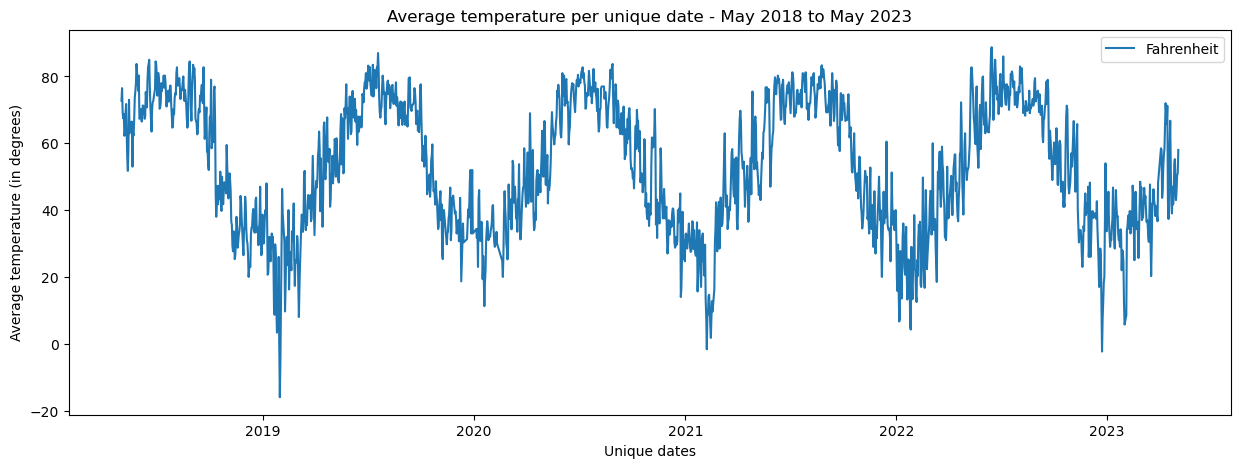

In [20]:
# Convert the index values to be datetime for the plot
xAxisDates = pd.to_datetime(onlyFourInstancesUniqueDatesDF.index, format = '%m-%d-%Y')

# Adjusting the plot size
plt.figure(figsize = (15, 5))

# Plotting the average Fahrenheit values based on unique dates
plt.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Temperature - Fahrenheit'], label = 'Fahrenheit')

# x and y axis label, its title, and the legend
plt.xlabel('Unique dates')
plt.ylabel('Average temperature (in degrees)')
plt.title('Average temperature per unique date - May 2018 to May 2023')
plt.legend()

#Showing the final graph
plt.show()

#### Average temperature & average relative humidity per date

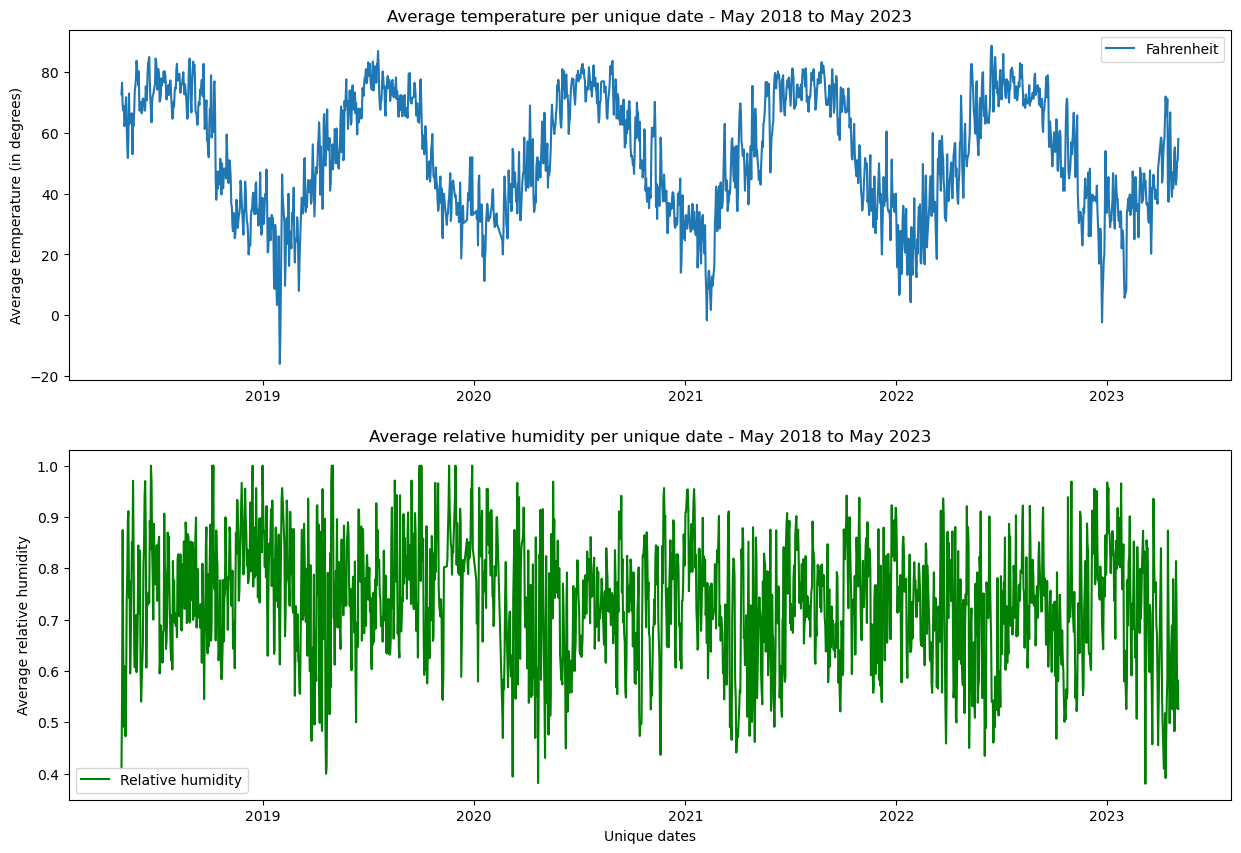

In [21]:
# Adjusting the plot size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 10))



# Plotting the average Fahrenheit values based on unique dates in subplot 1
ax1.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Temperature - Fahrenheit'], label = 'Fahrenheit')
ax1.set_ylabel('Average temperature (in degrees)')
ax1.set_title('Average temperature per unique date - May 2018 to May 2023')



# Plotting the average relative humidity values based on unique dates in subplot 2
ax2.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['RelativeHumidity'], color = 'Green', label = 'Relative humidity')
ax2.set_xlabel('Unique dates')
ax2.set_ylabel('Average relative humidity')
ax2.set_title('Average relative humidity per unique date - May 2018 to May 2023')


# Plotting legend within each subplot
ax1.legend()
ax2.legend()

# Showing the final graph
plt.show()

#### Average temperature & average pressure in inches of mercury

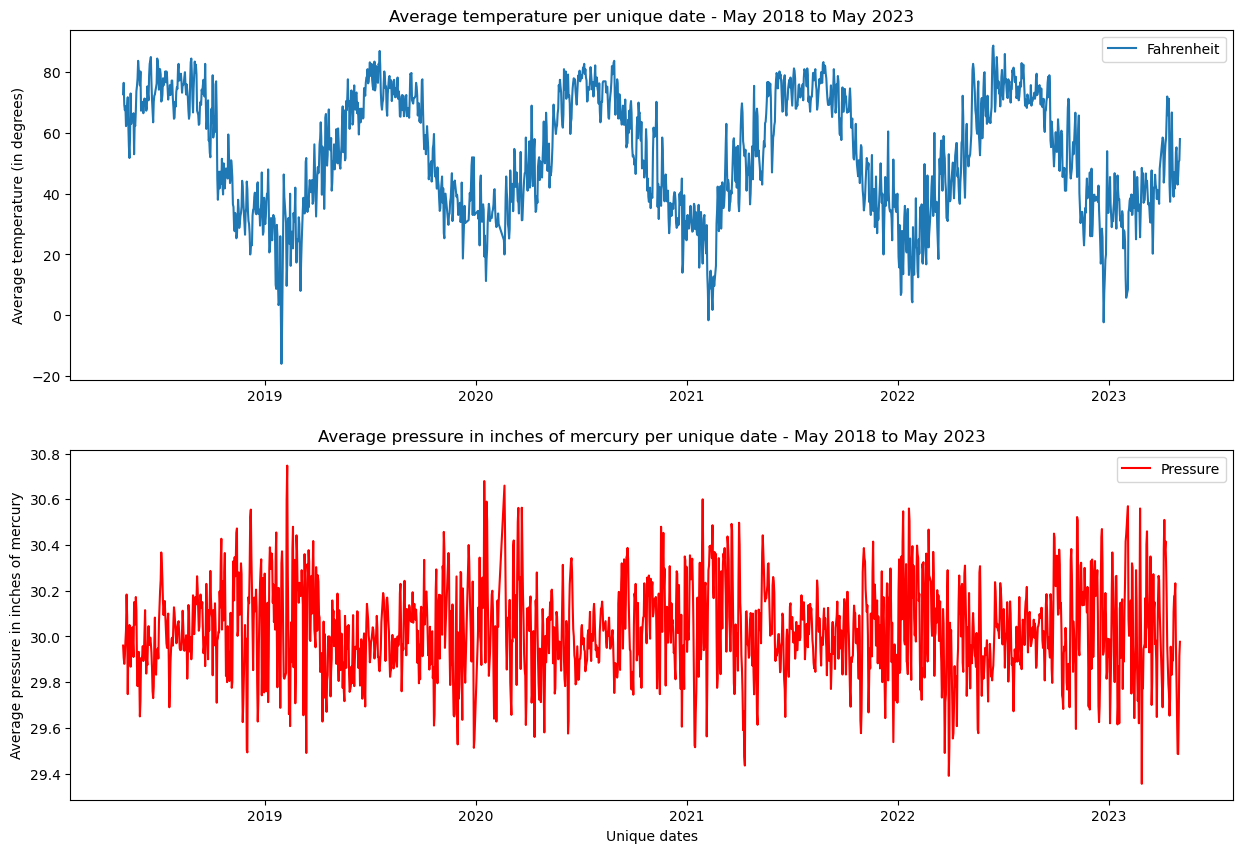

In [22]:
# Adjusting the plot size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 10))

# Plotting the average Fahrenheit values based on unique dates in subplot 1
ax1.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Temperature - Fahrenheit'], label = 'Fahrenheit')
ax1.set_ylabel('Average temperature (in degrees)')
ax1.set_title('Average temperature per unique date - May 2018 to May 2023')

# Plotting the average pressure in inches of mercury values based on unique dates in subplot 2
ax2.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Pressure - InchesOfMercury'], color = 'Red', label = 'Pressure')
ax2.set_xlabel('Unique dates')
ax2.set_ylabel('Average pressure in inches of mercury')
ax2.set_title('Average pressure in inches of mercury per unique date - May 2018 to May 2023')


# Plotting legend within each subplot
ax1.legend()
ax2.legend()

# Showing the final graph
plt.show()

#### Average temperature & average visibility in miles

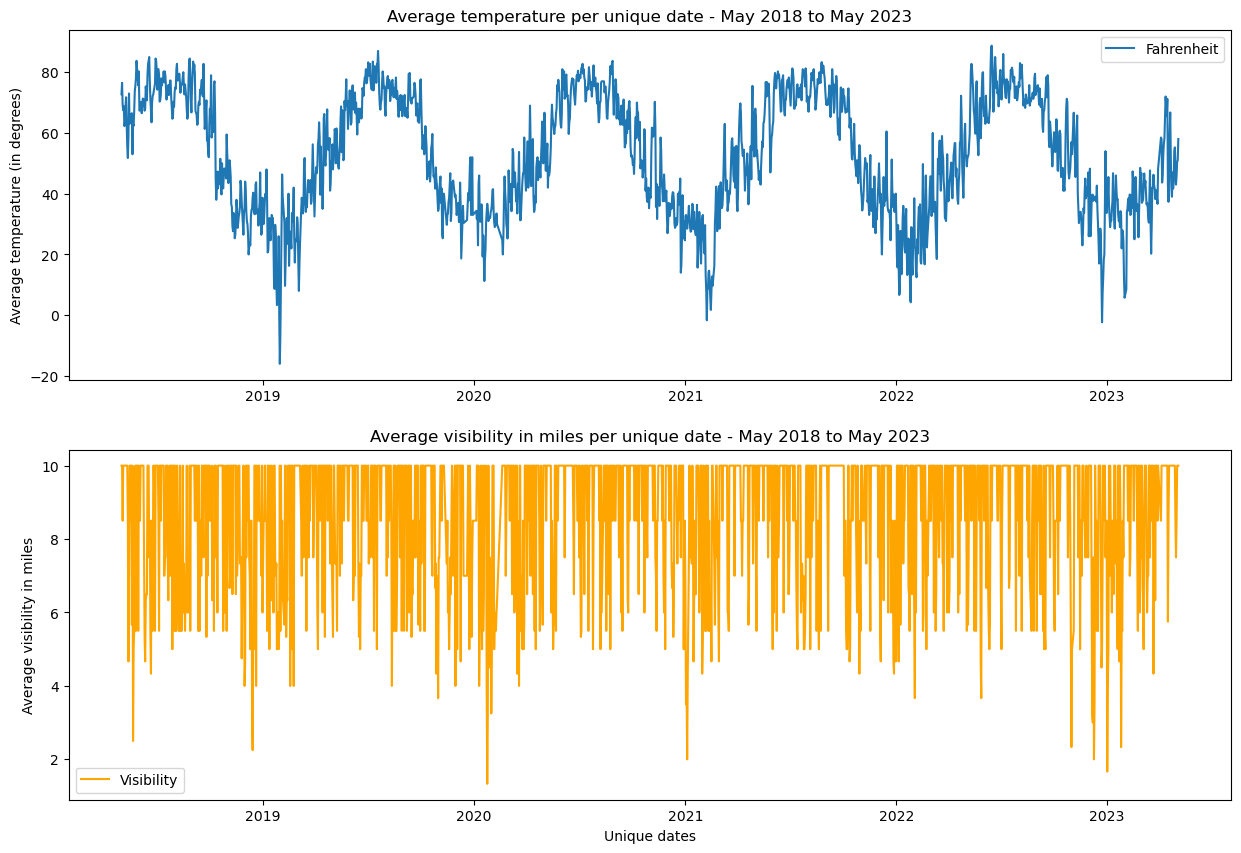

In [23]:
# Adjusting the plot size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 10))

# Plotting the average Fahrenheit values based on unique dates in subplot 1
ax1.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Temperature - Fahrenheit'], label = 'Fahrenheit')
ax1.set_ylabel('Average temperature (in degrees)')
ax1.set_title('Average temperature per unique date - May 2018 to May 2023')


# Plotting the average visibility in miles values based on unique dates in subplot 2
ax2.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Visibility - Miles'], color = 'Orange', label = 'Visibility')
ax2.set_xlabel('Unique dates')
ax2.set_ylabel('Average visibility in miles')
ax2.set_title('Average visibility in miles per unique date - May 2018 to May 2023')



# Plotting legend within each subplot
ax1.legend()
ax2.legend()

# Showing the final graph
plt.show()

#### Average temperature & average wind speed in miles per hour

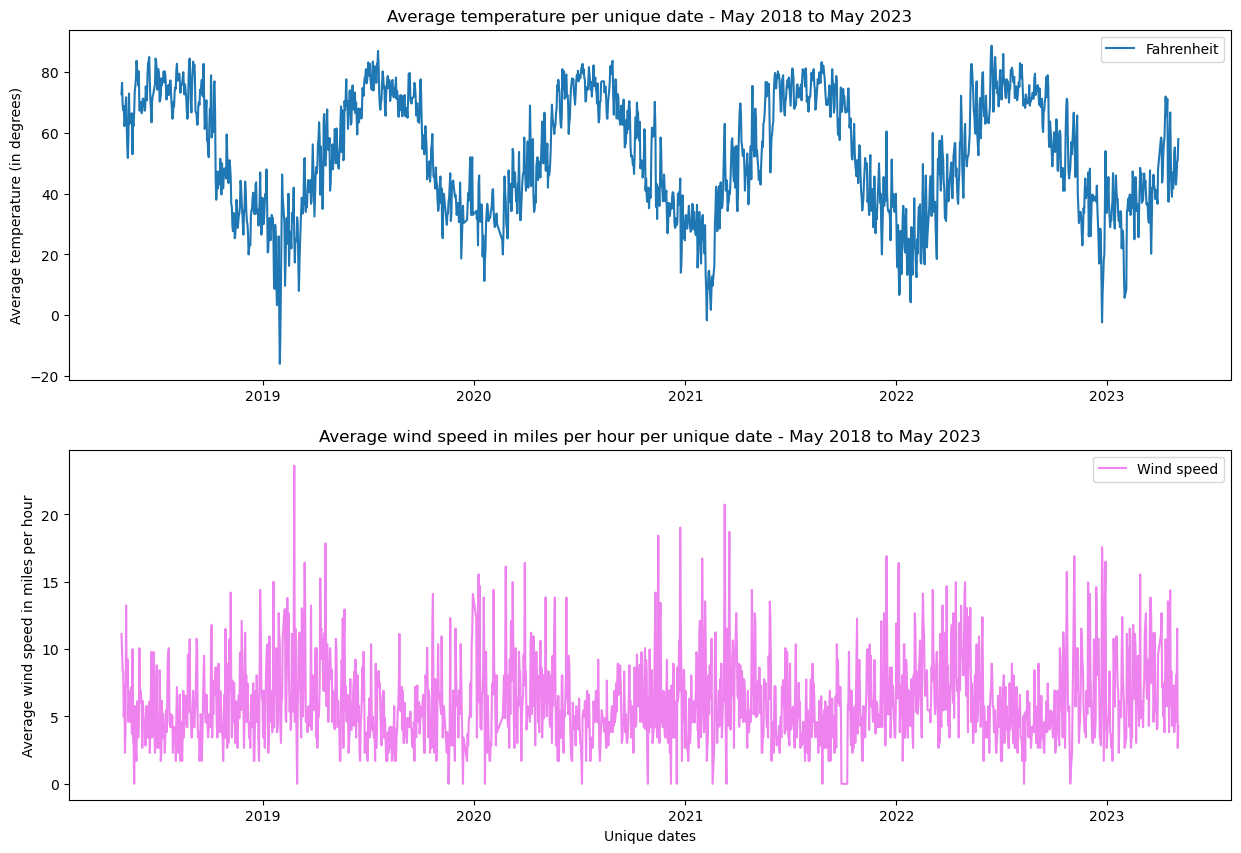

In [24]:
# Convert the index values to be datetime for the plot
xAxisDates = pd.to_datetime(onlyFourInstancesUniqueDatesDF.index, format = '%m-%d-%Y')

# Adjusting the plot size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 10))


# Plotting the average Fahrenheit values based on unique dates in subplot 1
ax1.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Temperature - Fahrenheit'], label = 'Fahrenheit')
ax1.set_ylabel('Average temperature (in degrees)')
ax1.set_title('Average temperature per unique date - May 2018 to May 2023')


# Plotting the average wind speed in miles per hour values based on unique dates in subplot 2
ax2.plot(xAxisDates, onlyFourInstancesUniqueDatesDF['Wind - Speed - MilesPerHour'], color = 'violet', label = 'Wind speed')
ax2.set_xlabel('Unique dates')
ax2.set_ylabel('Average wind speed in miles per hour')
ax2.set_title('Average wind speed in miles per hour per unique date - May 2018 to May 2023')



# Plotting legend within each subplot
ax1.legend()
ax2.legend()

# Showing the final graph
plt.show()

## Linear Regression Model

In [25]:
# New DF as copy from DF above
modelDF = onlyFourInstancesUniqueDatesDF.copy(deep = True)

# Converting index into datetime format
modelDF.index = pd.to_datetime(modelDF.index, format = '%m-%d-%Y')

# Day, Month, and dayOfYear columns created based on index data
modelDF['Day'] = modelDF.index.day
modelDF['Month'] = modelDF.index.month
modelDF['dayOfYear'] = modelDF.index.dayofyear
modelDF['Year'] = modelDF.index.year

In [26]:
# Creating training and testing sets
X = modelDF[['Day', 'Month', 'dayOfYear']]
yFahrenheit = modelDF['Temperature - Fahrenheit']
yCelsius = modelDF['Temperature - Celsius']

X_train, X_test, y_fTrain, y_fTest, y_cTrain, y_cTest = train_test_split(X, yFahrenheit, yCelsius, test_size = 0.2, random_state = 42)



In [27]:
# Training model for Fahrenheit
modelF = LinearRegression()
modelF.fit(X_train, y_fTrain)

# Training the model for Celsius
modelC = LinearRegression()
modelC.fit(X_train, y_cTrain)

LinearRegression()

In [28]:
# Prediction function
def predictTemperature(day, month):
    dayOfYear = pd.to_datetime(f'{month}-{day}', format = '%m-%d').dayofyear
    inputData = [[day, month, dayOfYear]]
    
    temperaturePredF = modelF.predict(inputData)[0]
    temperaturePredC = modelC.predict(inputData)[0]
    
    return temperaturePredF, temperaturePredC

In [45]:
# user input
while True:
    try:
        day = int(input("Please input a day: "))
        month = int(input("Please input a month: "))
        print()
        
        temperaturePredF, temperaturePredC = predictTemperature(day,month)
        
        if temperaturePredF is not None and temperaturePredC is not None:
            print("2024 predicted temperature for Joliet, IL in Fahrenheit:", temperaturePredF.round(2))
            print("2024 predicted temperature for Joliet, IL in Celsius:", temperaturePredC.round(2))
            print()
            
        break
    except ValueError:
        print("Invalid input, please try again.")
        print()

# displays prior yearly data for input above
userInputDF = modelDF.copy(deep = True)
userInputDF = userInputDF[(userInputDF['Month'] == month) & (userInputDF['Day'] == day)]
userInputDF.drop(['Day', 'Month', 'dayOfYear', 'Year'], axis = 1, inplace = True)
userInputDF.index = pd.to_datetime(userInputDF.index).year
userInputDF = userInputDF.rename_axis('Year', axis = 'index')

print()
print('\033[1m' + 'Yearly Data for ' + str(month) + "-" + str(day) + '\033[0m')

display(userInputDF.T)

Please input a day: 10
Please input a month: 2

2024 predicted temperature for Joliet, IL in Fahrenheit: 32.95
2024 predicted temperature for Joliet, IL in Celsius: 0.53


Yearly Data for 2-10


Year,2019,2020,2021,2022,2023
RelativeHumidity,0.830333,0.89975,0.65075,0.78975,0.74925
CurrentConditions,"[Overcast Sky, Mist]","[Overcast Sky, Mist]","[Clear Skies, Light Snow, Overcast Sky]","[Broken Sky, Overcast Sky]","[Clear Skies, Mist]"
ConditionType,[Cloudy],"[Clear, Cloudy]","[Clear, Cloudy]",[Cloudy],"[Clear, Cloudy]"
CloudReport,[Overcast Sky],"[Clear Skies, Overcast Sky]","[Clear Skies, Overcast Sky]","[Broken Sky / Overcast Sky, Overcast Sky]","[Clear Skies, Overcast Sky]"
Temperature - Fahrenheit,27.666667,30,14.25,31,33
Temperature - Celsius,-2.333333,-1,-10,-0.5,0.5
Dewpoint - Fahrenheit,22.666667,26.666667,5.666667,25.333333,26.666667
Dewpoint - Celsius,-5,-3,-14.666667,-3.666667,-3
FeelsLike - Type,"[Windchill, None]","[Windchill, None]",[Windchill],[Windchill],"[Windchill, None]"
FeelsLike - Fahrenheit,22.666667,26.666667,3.75,23.5,30
